In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\utkar\Downloads\test(in) (1).csv")
print(df.head())


                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from  
0     sally.beck@enron.com  
1      eric.bass@enron.com  
2     sally.beck@enron.com  
3  johnny.palmer@enron.com  
4  lydia.delgado@enron.com  


In [15]:
#Objective 1 Labeling Email as "Positive", "Negative", or "Neutral"

import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')


df = pd.read_csv(r"C:\Users\utkar\Downloads\test(in) (1).csv")
TEXT_COLUMN = "body"


sia = SentimentIntensityAnalyzer()

# Sentiment classification function
def get_sentiment(text):
    scores = sia.polarity_scores(str(text))
    compound = scores['compound']
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"


df['sentiment'] = df[TEXT_COLUMN].apply(get_sentiment)

df.to_csv("emails_with_sentiment.csv", index=False)


print(df[[TEXT_COLUMN, 'sentiment']].head())





[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                body sentiment
0  EnronOptions Announcement\n\n\nWe have updated...  Positive
1  Marc,\n\nUnfortunately, today is not going to ...  Positive
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...   Neutral
3  we were thinking papasitos (we can meet somewh...   Neutral
4  Since you never gave me the $20 for the last t...  Positive


In [29]:
#Task 2 EDA
df = pd.read_csv(r"C:\Users\utkar\Downloads\test(in) (1).csv")
df.info()
df.shape
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  2191 non-null   object
 1   body     2191 non-null   object
 2   date     2191 non-null   object
 3   from     2191 non-null   object
dtypes: object(4)
memory usage: 68.6+ KB


<bound method NDFrame.describe of                                                 Subject  \
0                                  EnronOptions Update!   
1                                          (No Subject)   
2          Phone Screen  Interview - Shannon L. Burnham   
3                                 RE: My new work email   
4                                                   Bet   
...                                                 ...   
2186                                         Re: Resume   
2187  Final Schedule - Wednesday, May 2, 2001 - Jesu...   
2188                                       (No Subject)   
2189                                      League is Set   
2190                                 AirCard Activation   

                                                   body        date  \
0     EnronOptions Announcement\n\n\nWe have updated...   5/10/2010   
1     Marc,\n\nUnfortunately, today is not going to ...   7/29/2010   
2     When: Wednesday, June 06, 2001 10:00 A

C:\Users\utkar\AppData\Local\Temp\ipykernel_26568\4173341039.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'sentiment', data = df_2, palette = "Set2")


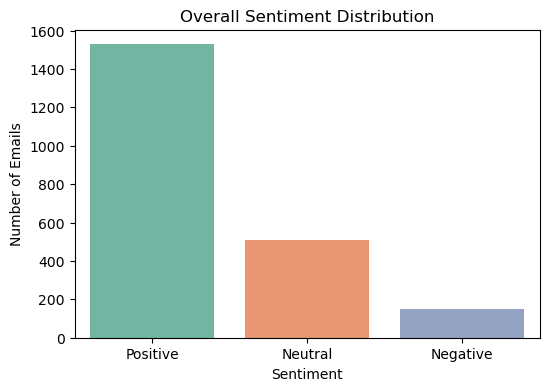

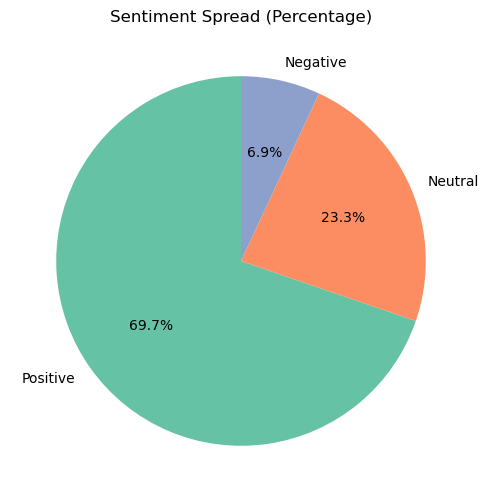

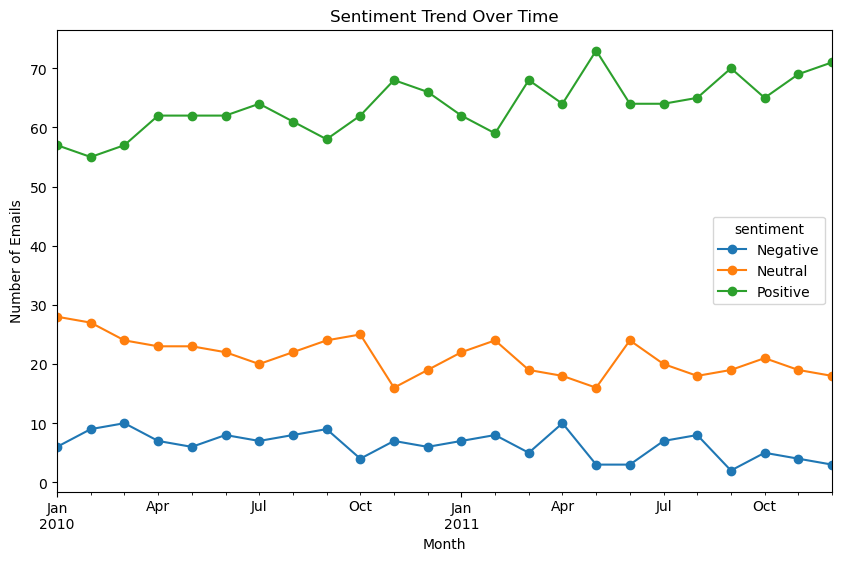

Subject      0
body         0
date         0
from         0
sentiment    0
dtype: int64
sentiment
Positive    0.697398
Neutral     0.233227
Negative    0.069375
Name: proportion, dtype: float64


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

df_2 = pd.read_csv("emails_with_sentiment.csv")
# Bar grpah for sentiment score 
plt.figure(figsize = (6,4))
sns.countplot(x = 'sentiment', data = df_2, palette = "Set2")
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Emails")
plt.show()

#Sentiment percentages (pie chart)

sent_counts = df_2['sentiment'].value_counts(normalize=True)
plt.figure(figsize=(6,6))
plt.pie(sent_counts, labels=sent_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Sentiment Spread (Percentage)")
plt.show()
# Sentiment Trend Over time
if 'date' in df.columns:
    df_2['date'] = pd.to_datetime(df_2['date'])
    sentiment_trend = df_2.groupby([df_2['date'].dt.to_period("M"), 'sentiment']).size().unstack(fill_value=0)

    sentiment_trend.plot(kind='line', figsize=(10,6), marker='o')
    plt.title("Sentiment Trend Over Time")
    plt.xlabel("Month")
    plt.ylabel("Number of Emails")
    plt.show()

# Checking for Missing values
print(df_2.isnull().sum())




In [68]:
# Task 3 Employee Score Calculation

score_map = {"Positive": 1, "Negative": -1, "Neutral": 0}
df_2['sentiment_score'] = df_2['sentiment'].map(score_map)


df_2['date'] = pd.to_datetime(df_2['date'])
df_2['month'] = df_2['date'].dt.to_period("M")   # e.g., 2025-08


monthly_scores = (
    df_2.groupby(['from', 'month'])['sentiment_score']
      .sum()
      .reset_index()
)


monthly_scores = monthly_scores.sort_values(by=['from', 'month'])


monthly_scores.to_csv("employee_monthly_sentiment.csv", index=False)

print(monthly_scores.head(100))



                           from    month  sentiment_score
0   bobette.riner@ipgdirect.com  2010-01                1
1   bobette.riner@ipgdirect.com  2010-02                7
2   bobette.riner@ipgdirect.com  2010-03                6
3   bobette.riner@ipgdirect.com  2010-04                3
4   bobette.riner@ipgdirect.com  2010-05                2
..                          ...      ...              ...
95        john.arnold@enron.com  2011-12                4
96      johnny.palmer@enron.com  2010-01                1
97      johnny.palmer@enron.com  2010-02               10
98      johnny.palmer@enron.com  2010-03                5
99      johnny.palmer@enron.com  2010-04                5

[100 rows x 3 columns]



=== Monthly Top 3 Rankings ===
  month                         list  rank                        from  monthly_score
2010-01 Top Three Negative Employees     1 bobette.riner@ipgdirect.com              1
2010-01 Top Three Negative Employees     2     johnny.palmer@enron.com              1
2010-01 Top Three Negative Employees     3     rhonda.denton@enron.com              1
2010-01 Top Three Positive Employees     1     kayne.coulter@enron.com             13
2010-01 Top Three Positive Employees     2         eric.bass@enron.com              9
2010-01 Top Three Positive Employees     3     lydia.delgado@enron.com              9
2010-02 Top Three Negative Employees     1     kayne.coulter@enron.com              1
2010-02 Top Three Negative Employees     2     lydia.delgado@enron.com              1
2010-02 Top Three Negative Employees     3    patti.thompson@enron.com              1
2010-02 Top Three Positive Employees     1       john.arnold@enron.com             11
2010-02 Top Three Posi

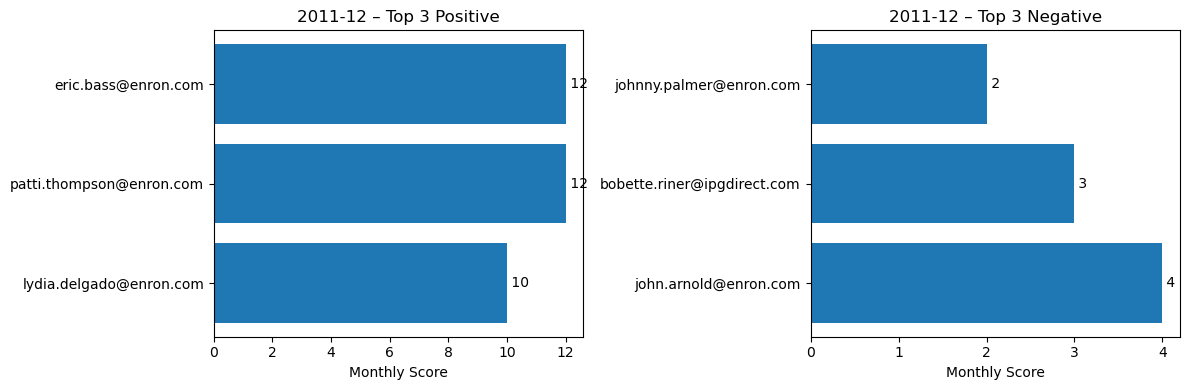

In [84]:
# Task 4 Employee Ranking


df_3 = pd.read_csv("employee_monthly_sentiment.csv")

if "monthly_score" not in df_3.columns and "sentiment_score" in df_3.columns:
    df_3 = df_3.rename(columns={"sentiment_score": "monthly_score"})

required_cols = {"from", "month", "monthly_score"}
missing = required_cols - set(df_3.columns)
if missing:
    raise KeyError(f"Missing required columns: {sorted(missing)}")

df_3["month"] = pd.PeriodIndex(pd.to_datetime(df_3["month"], errors="coerce"), freq="M")
df_3 = df_3.dropna(subset=["from", "month", "monthly_score"])

top3_positive = (
    df_3.sort_values(["month", "monthly_score", "from"], ascending=[True, False, True])
        .groupby("month", as_index=False)
        .head(3)
        .copy()
)
top3_positive["rank"] = (
    top3_positive
        .sort_values(["month", "monthly_score", "from"], ascending=[True, False, True])
        .groupby("month")
        .cumcount() + 1
)
top3_positive["list"] = "Top Three Positive Employees"

top3_negative = (
    df_3.sort_values(["month", "monthly_score", "from"], ascending=[True, True, True])
        .groupby("month", as_index=False)
        .head(3)
        .copy()
)
top3_negative["rank"] = (
    top3_negative
        .sort_values(["month", "monthly_score", "from"], ascending=[True, True, True])
        .groupby("month")
        .cumcount() + 1
)
top3_negative["list"] = "Top Three Negative Employees"

rankings = pd.concat([top3_positive, top3_negative], ignore_index=True)
rankings["month"] = rankings["month"].astype(str)
rankings = rankings.sort_values(["month", "list", "rank", "from"]).reset_index(drop=True)

print("\n=== Monthly Top 3 Rankings ===")
print(rankings[["month", "list", "rank", "from", "monthly_score"]].to_string(index=False))


#Notes
#Each message was labeled Positive (+1), Negative (–1), or Neutral (0), then grouped by employee (from) and calendar month (date converted to Year–Month) so scores naturally reset each month. 
#For each (from, month) pair, we summed message scores to produce a single monthly_score. Monthly rankings were derived directly from these totals: Top Three Positive Employees are the three highest monthly_score values per month (sorted by score descending, then alphabetically by from to break ties), and Top Three Negative Employees are the three lowest values (sorted by score ascending, then alphabetically). 
#No extra weights or normalizations were applied; rows with missing/invalid dates were excluded from aggregation.
import matplotlib.pyplot as plt

# --- 1) Visualize a single month (side-by-side bar charts) ---
def plot_month_rankings(rankings, month_str, save_path=None, show=True):
    month_df = rankings[rankings["month"] == month_str]

    pos = (month_df[month_df["list"] == "Top Three Positive Employees"]
           .sort_values("rank"))
    neg = (month_df[month_df["list"] == "Top Three Negative Employees"]
           .sort_values("rank"))

    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

    # Positive — horizontal bars
    axes[0].barh(pos["from"], pos["monthly_score"])
    axes[0].invert_yaxis()  # rank 1 at top
    axes[0].set_title(f"{month_str} – Top 3 Positive")
    axes[0].set_xlabel("Monthly Score")
    for i, v in enumerate(pos["monthly_score"].tolist()):
        axes[0].text(v, i, f" {int(v)}", va="center")

    # Negative — horizontal bars (will be <= 0; plot as-is)
    axes[1].barh(neg["from"], neg["monthly_score"])
    axes[1].invert_yaxis()
    axes[1].set_title(f"{month_str} – Top 3 Negative")
    axes[1].set_xlabel("Monthly Score")
    for i, v in enumerate(neg["monthly_score"].tolist()):
        axes[1].text(v, i, f" {int(v)}", va="center")

    plt.tight_layout()

    if save_path:
        fig.savefig(save_path, bbox_inches="tight", dpi=150)
    if show:
        plt.show()
    else:
        plt.close(fig)

# Example: plot the latest month
latest_month = sorted(rankings["month"].unique())[-1]
plot_month_rankings(rankings, latest_month)


In [78]:
# Task 5 Flight Risk Employees
import pandas as pd

df4 = pd.read_csv("emails_with_sentiment.csv")

df4 = df4.dropna(subset=["from", "date", "sentiment"])
df4["date"] = pd.to_datetime(df4["date"], errors="coerce")
df4 = df4.dropna(subset=["date"])
df4["sentiment"] = df4["sentiment"].astype(str).str.strip().str.capitalize()  # e.g., "negative" -> "Negative"

df4["is_neg"] = (df4["sentiment"] == "Negative").astype(int)

df4 = df4.sort_values(["from", "date"]).copy()
neg_rolling = (
    df4.set_index("date")
       .groupby("from")["is_neg"]
       .rolling("30D")           # window = last 30 days INCLUDING current date
       .sum()
       .reset_index()
       .rename(columns={"is_neg": "neg_30d"})
)

df4 = df4.merge(neg_rolling, on=["from", "date"], how="left")

df4["flight_risk_flag"] = df4["neg_30d"] >= 4

flight_risk_employees = (
    df4.loc[df4["flight_risk_flag"], "from"]
       .drop_duplicates()
       .sort_values()
       .tolist()
)

print("Flight Risk Employees:", flight_risk_employees)

first_flag = (
    df4.loc[df4["flight_risk_flag"]]
       .groupby("from", as_index=False)["date"]
       .min()
       .rename(columns={"date": "first_flag_date"})
)
peak_neg = (
    df4.groupby("from", as_index=False)["neg_30d"]
       .max()
       .rename(columns={"neg_30d": "max_neg_30d"})
)
flight_risk_report = (
    first_flag.merge(peak_neg, on="from", how="left")
              .sort_values(["first_flag_date", "from"])
              .reset_index(drop=True)
)

print("\n=== Flight Risk Report ===")
print(flight_risk_report.to_string(index=False))






Flight Risk Employees: ['bobette.riner@ipgdirect.com', 'don.baughman@enron.com', 'johnny.palmer@enron.com', 'sally.beck@enron.com']

=== Flight Risk Report ===
                       from first_flag_date  max_neg_30d
    johnny.palmer@enron.com      2010-03-10          4.0
bobette.riner@ipgdirect.com      2010-09-30          4.0
     don.baughman@enron.com      2011-01-09          4.0
       sally.beck@enron.com      2011-08-22          5.0


C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


=== Test Metrics ===
R^2:   0.723
MAE:   2.151
RMSE:  3.031

=== Standardized Coefficients (desc) ===
      feature  coef_std
     num_msgs  6.391673
avg_len_words  0.876212
  exclam_rate  0.369731
 msgs_per_day  0.347395
   lag1_score  0.332889
question_rate  0.106826
  upper_ratio -0.112004
lag1_num_msgs -0.357192
avg_len_chars -0.627774


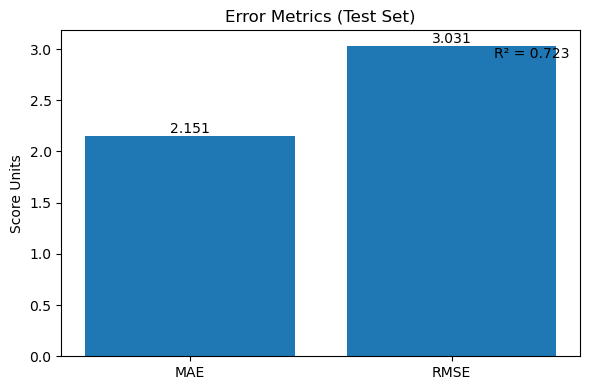

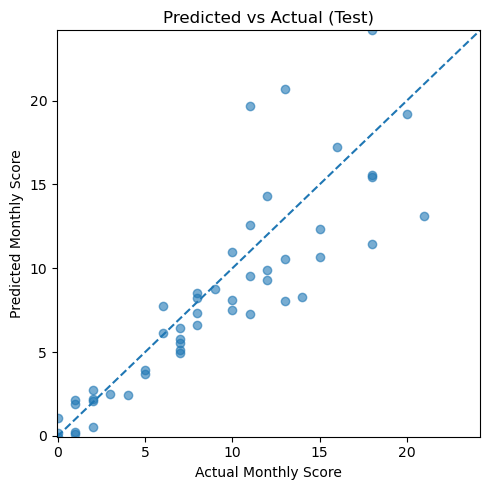

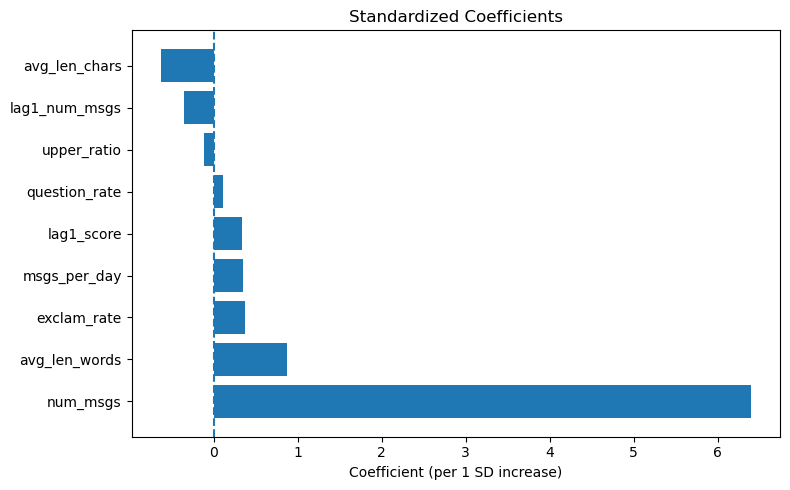

In [90]:
# Task 6 Linear Regression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df4 = df4.copy()
df4 = df4.dropna(subset=["from", "date", "sentiment"])
df4["date"] = pd.to_datetime(df4["date"], errors="coerce")
df4 = df4.dropna(subset=["date"])
df4["sentiment"] = df4["sentiment"].astype(str).str.strip().str.capitalize()

score_map = {"Positive": 1, "Neutral": 0, "Negative": -1}
df4["sentiment_score"] = df4["sentiment"].map(score_map)

if "body" not in df4.columns:
    raise ValueError("Expected a 'body' column with the email text. Rename your text column to 'body' or edit the code.")

df4["body"] = df4["body"].astype(str)
df4["len_chars"]   = df4["body"].str.len()
df4["len_words"]   = df4["body"].str.split().str.len().fillna(0)
df4["exclam_cnt"]  = df4["body"].str.count("!")
df4["quest_cnt"]   = df4["body"].str.count(r"\?")

def upper_ratio(s):
    letters = sum(c.isalpha() for c in s)
    uppers  = sum(c.isupper() for c in s)
    return (uppers / letters) if letters else 0.0
df4["upper_ratio"] = df4["body"].apply(upper_ratio)

df4["month"] = df4["date"].dt.to_period("M")


agg = (
    df4.groupby(["from", "month"])
       .agg(
           monthly_score=("sentiment_score", "sum"),     # TARGET
           num_msgs=("sentiment", "size"),
           avg_len_chars=("len_chars", "mean"),
           avg_len_words=("len_words", "mean"),
           exclam_rate=("exclam_cnt", "mean"),
           question_rate=("quest_cnt", "mean"),
           upper_ratio=("upper_ratio", "mean"),
           days_active=("date", lambda s: s.dt.date.nunique()),
       )
       .reset_index()
)


agg["msgs_per_day"] = agg["num_msgs"] / agg["days_active"].replace(0, 1)


agg = agg.sort_values(["from", "month"])
agg["lag1_score"]     = agg.groupby("from")["monthly_score"].shift(1).fillna(0)
agg["lag1_num_msgs"]  = agg.groupby("from")["num_msgs"].shift(1).fillna(0)



months_sorted = np.array(sorted(agg["month"].unique()))
split_idx = int(0.8 * len(months_sorted)) if len(months_sorted) > 1 else 1
train_months = set(months_sorted[:split_idx])
test_months  = set(months_sorted[split_idx:]) if split_idx < len(months_sorted) else set(months_sorted[-1:])

train_df = agg[agg["month"].isin(train_months)].copy()
test_df  = agg[agg["month"].isin(test_months)].copy()

feature_cols = [
    "num_msgs", "msgs_per_day",
    "avg_len_chars", "avg_len_words",
    "exclam_rate", "question_rate", "upper_ratio",
    "lag1_score", "lag1_num_msgs"
]
target_col = "monthly_score"

X_train, y_train = train_df[feature_cols], train_df[target_col]
X_test,  y_test  = test_df[feature_cols],  test_df[target_col]


pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


r2  = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("=== Test Metrics ===")
print(f"R^2:   {r2:0.3f}")
print(f"MAE:   {mae:0.3f}")
print(f"RMSE:  {rmse:0.3f}")


coefs = pipe.named_steps["linreg"].coef_
coef_df = pd.DataFrame({
    "feature": feature_cols,
    "coef_std": coefs
}).sort_values("coef_std", ascending=False)

print("\n=== Standardized Coefficients (desc) ===")
print(coef_df.to_string(index=False))

import numpy as np
import matplotlib.pyplot as plt

# --- 1) Error metrics (bar chart) ---
plt.figure(figsize=(6,4))
bars = plt.bar(["MAE", "RMSE"], [mae, rmse])
plt.ylabel("Score Units")
plt.title("Error Metrics (Test Set)")
# annotate the exact values and R^2 without changing them
for b, v in zip(bars, [mae, rmse]):
    plt.text(b.get_x() + b.get_width()/2, b.get_height(), f"{v:.3f}", ha="center", va="bottom")
plt.text(0.98, 0.95, f"R² = {r2:.3f}", ha="right", va="top", transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

# --- 2) Predicted vs Actual (scatter) ---
y_true = np.asarray(y_test)
y_hat  = np.asarray(y_pred)

plt.figure(figsize=(5,5))
plt.scatter(y_true, y_hat, alpha=0.6)
mn = min(y_true.min(), y_hat.min())
mx = max(y_true.max(), y_hat.max())
plt.plot([mn, mx], [mn, mx], linestyle="--")
plt.xlabel("Actual Monthly Score")
plt.ylabel("Predicted Monthly Score")
plt.title("Predicted vs Actual (Test)")
plt.xlim(mn, mx)
plt.ylim(mn, mx)
plt.tight_layout()
plt.show()

# --- 3) Coefficients (horizontal bar chart) ---
# assumes coef_df has columns: ['feature','coef_std']
plt.figure(figsize=(8,5))
plt.barh(coef_df["feature"], coef_df["coef_std"])
plt.axvline(0, linestyle="--")
plt.title("Standardized Coefficients")
plt.xlabel("Coefficient (per 1 SD increase)")
plt.tight_layout()
plt.show()



